<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS%20-%20Affinity%20Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

## **Dataset**

In [27]:
datasetAffProp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetAffProp.drop(['Id'], axis=1, inplace=True)

datasetAffProp.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetAffProp.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


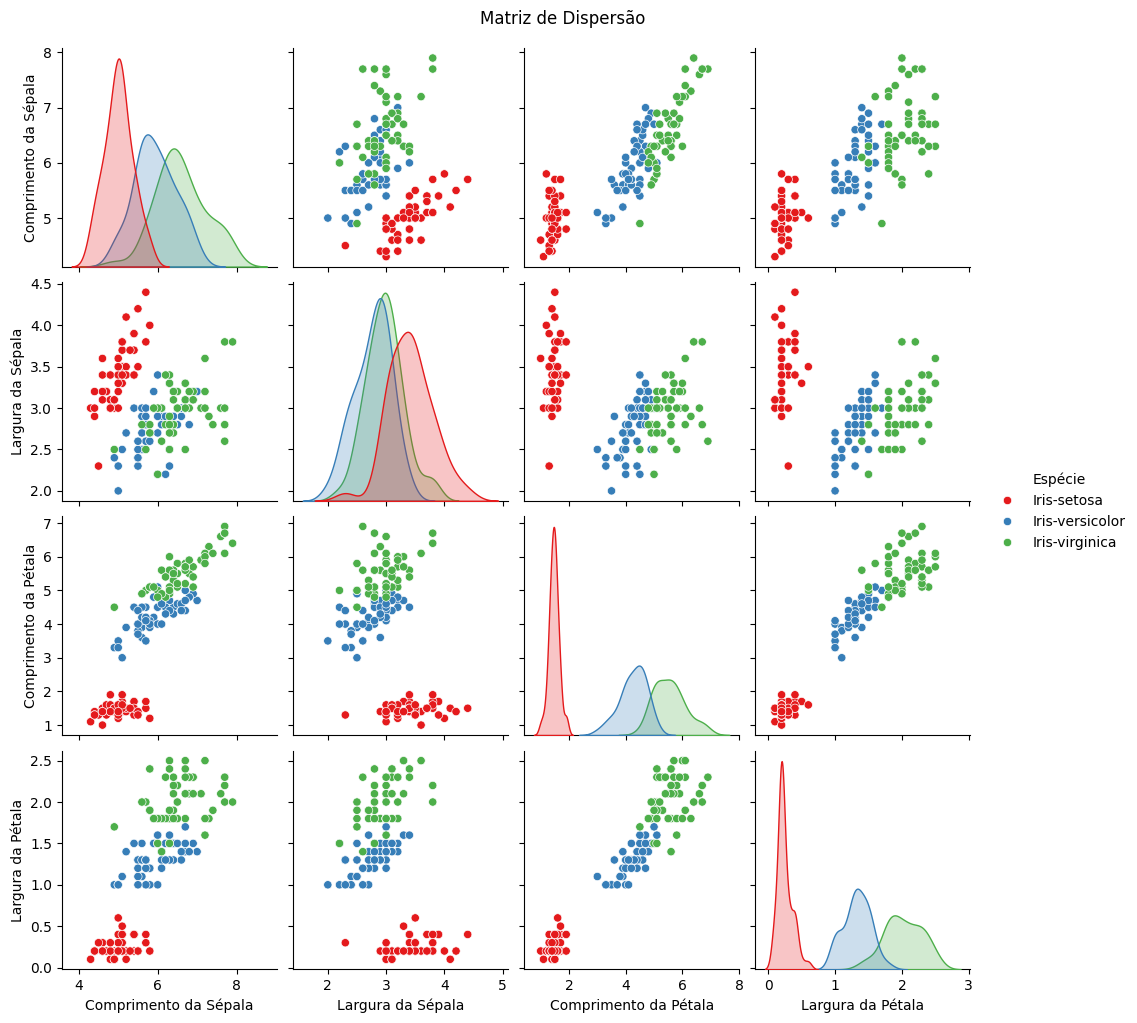

In [28]:
sns.pairplot(datasetAffProp, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

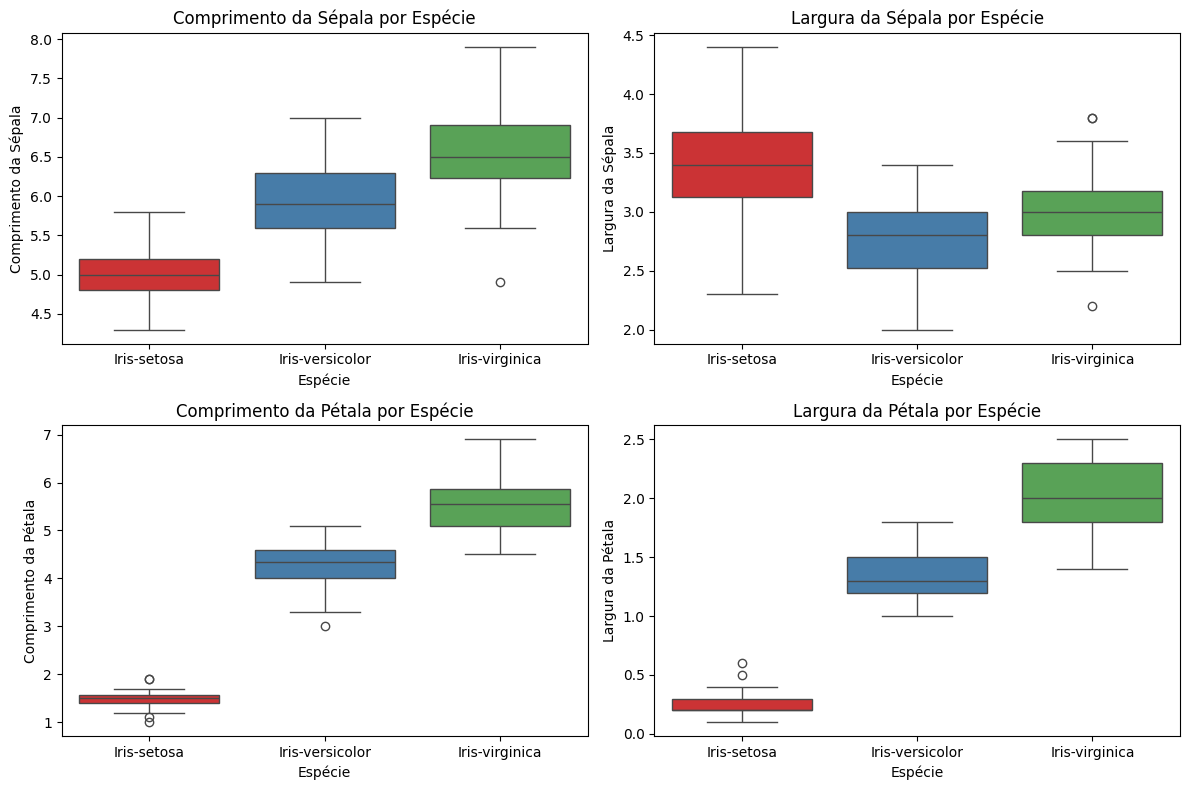

In [29]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetAffProp.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetAffProp, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

In [30]:
#FUNÇÃO PARA REMOVER OUTLIERS
def remover_outliers_por_categoria(dataset, coluna_valor, coluna_categoria):
    datasetArrumado = pd.DataFrame()

    for categoria in dataset[coluna_categoria].unique():
        grupo = dataset[dataset[coluna_categoria] == categoria]

        Q1 = grupo[coluna_valor].quantile(0.25)
        Q3 = grupo[coluna_valor].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_filtrado = grupo[(grupo[coluna_valor] >= limite_inferior) & (grupo[coluna_valor] <= limite_superior)]
        datasetArrumado = pd.concat([datasetArrumado, grupo_filtrado])

    return datasetArrumado

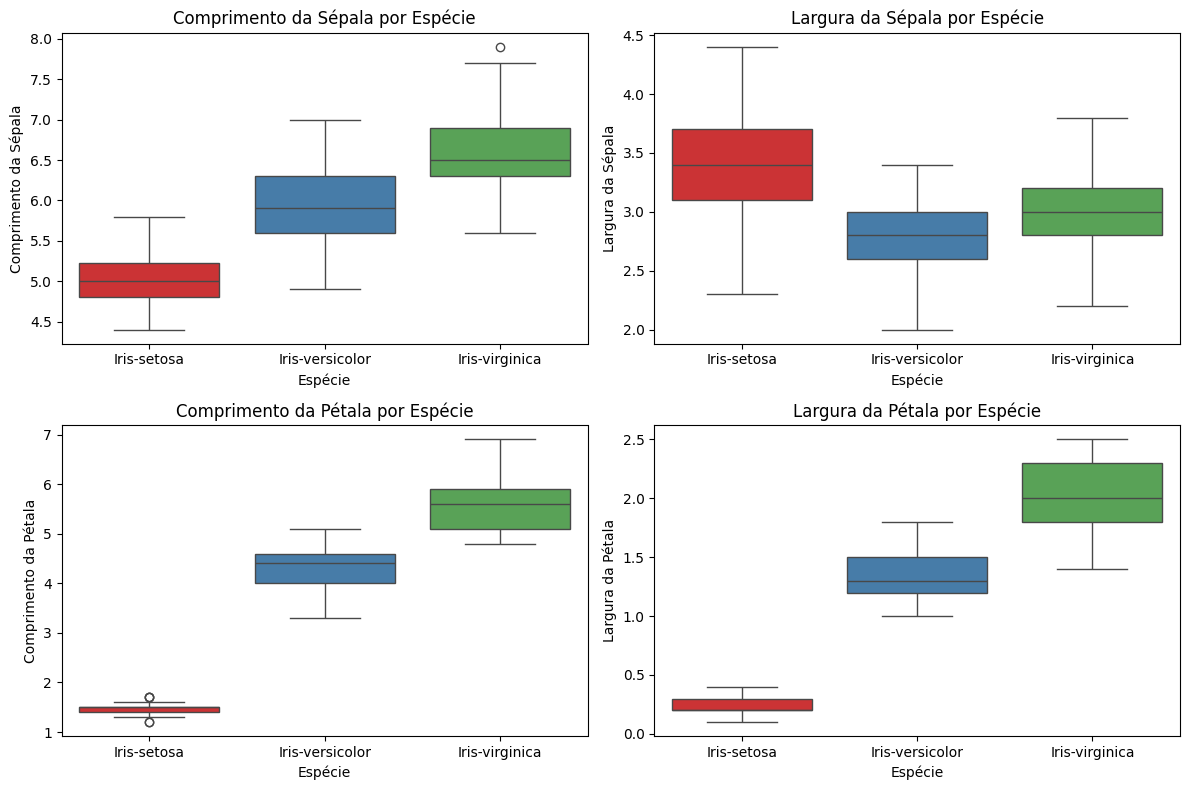

In [31]:
datasetAffPropArrumado = datasetAffProp.copy()

colunas = ['Comprimento da Sépala', 'Largura da Sépala',
           'Comprimento da Pétala', 'Largura da Pétala']

for coluna in colunas:
    datasetAffPropArrumado = remover_outliers_por_categoria(datasetAffPropArrumado, coluna, 'Espécie')

datasetAffPropArrumado = datasetAffPropArrumado.reset_index(drop=True)

plt.figure(figsize=(12, 8))
for i, coluna in enumerate(datasetAffPropArrumado.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetAffPropArrumado, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')
plt.tight_layout()
plt.show()

## **Modelo**

In [32]:
#DEFINIR VARIÁVEIS
XAffProp = datasetAffPropArrumado.drop(["Espécie"], axis=1)

scaler = StandardScaler()
XAffProp_scaled = scaler.fit_transform(XAffProp)
XAffProp = pd.DataFrame(XAffProp_scaled, columns=datasetAffPropArrumado.drop(["Espécie"], axis=1).columns)

#TREINO DO MODELO
modelAffProp = AffinityPropagation(preference=-50, random_state=42)
YAffProp = modelAffProp.fit_predict(XAffProp)

In [33]:
print("Número de Clusters:", len(modelAffProp.cluster_centers_indices_))

Número de Clusters: 3


## **Extra**

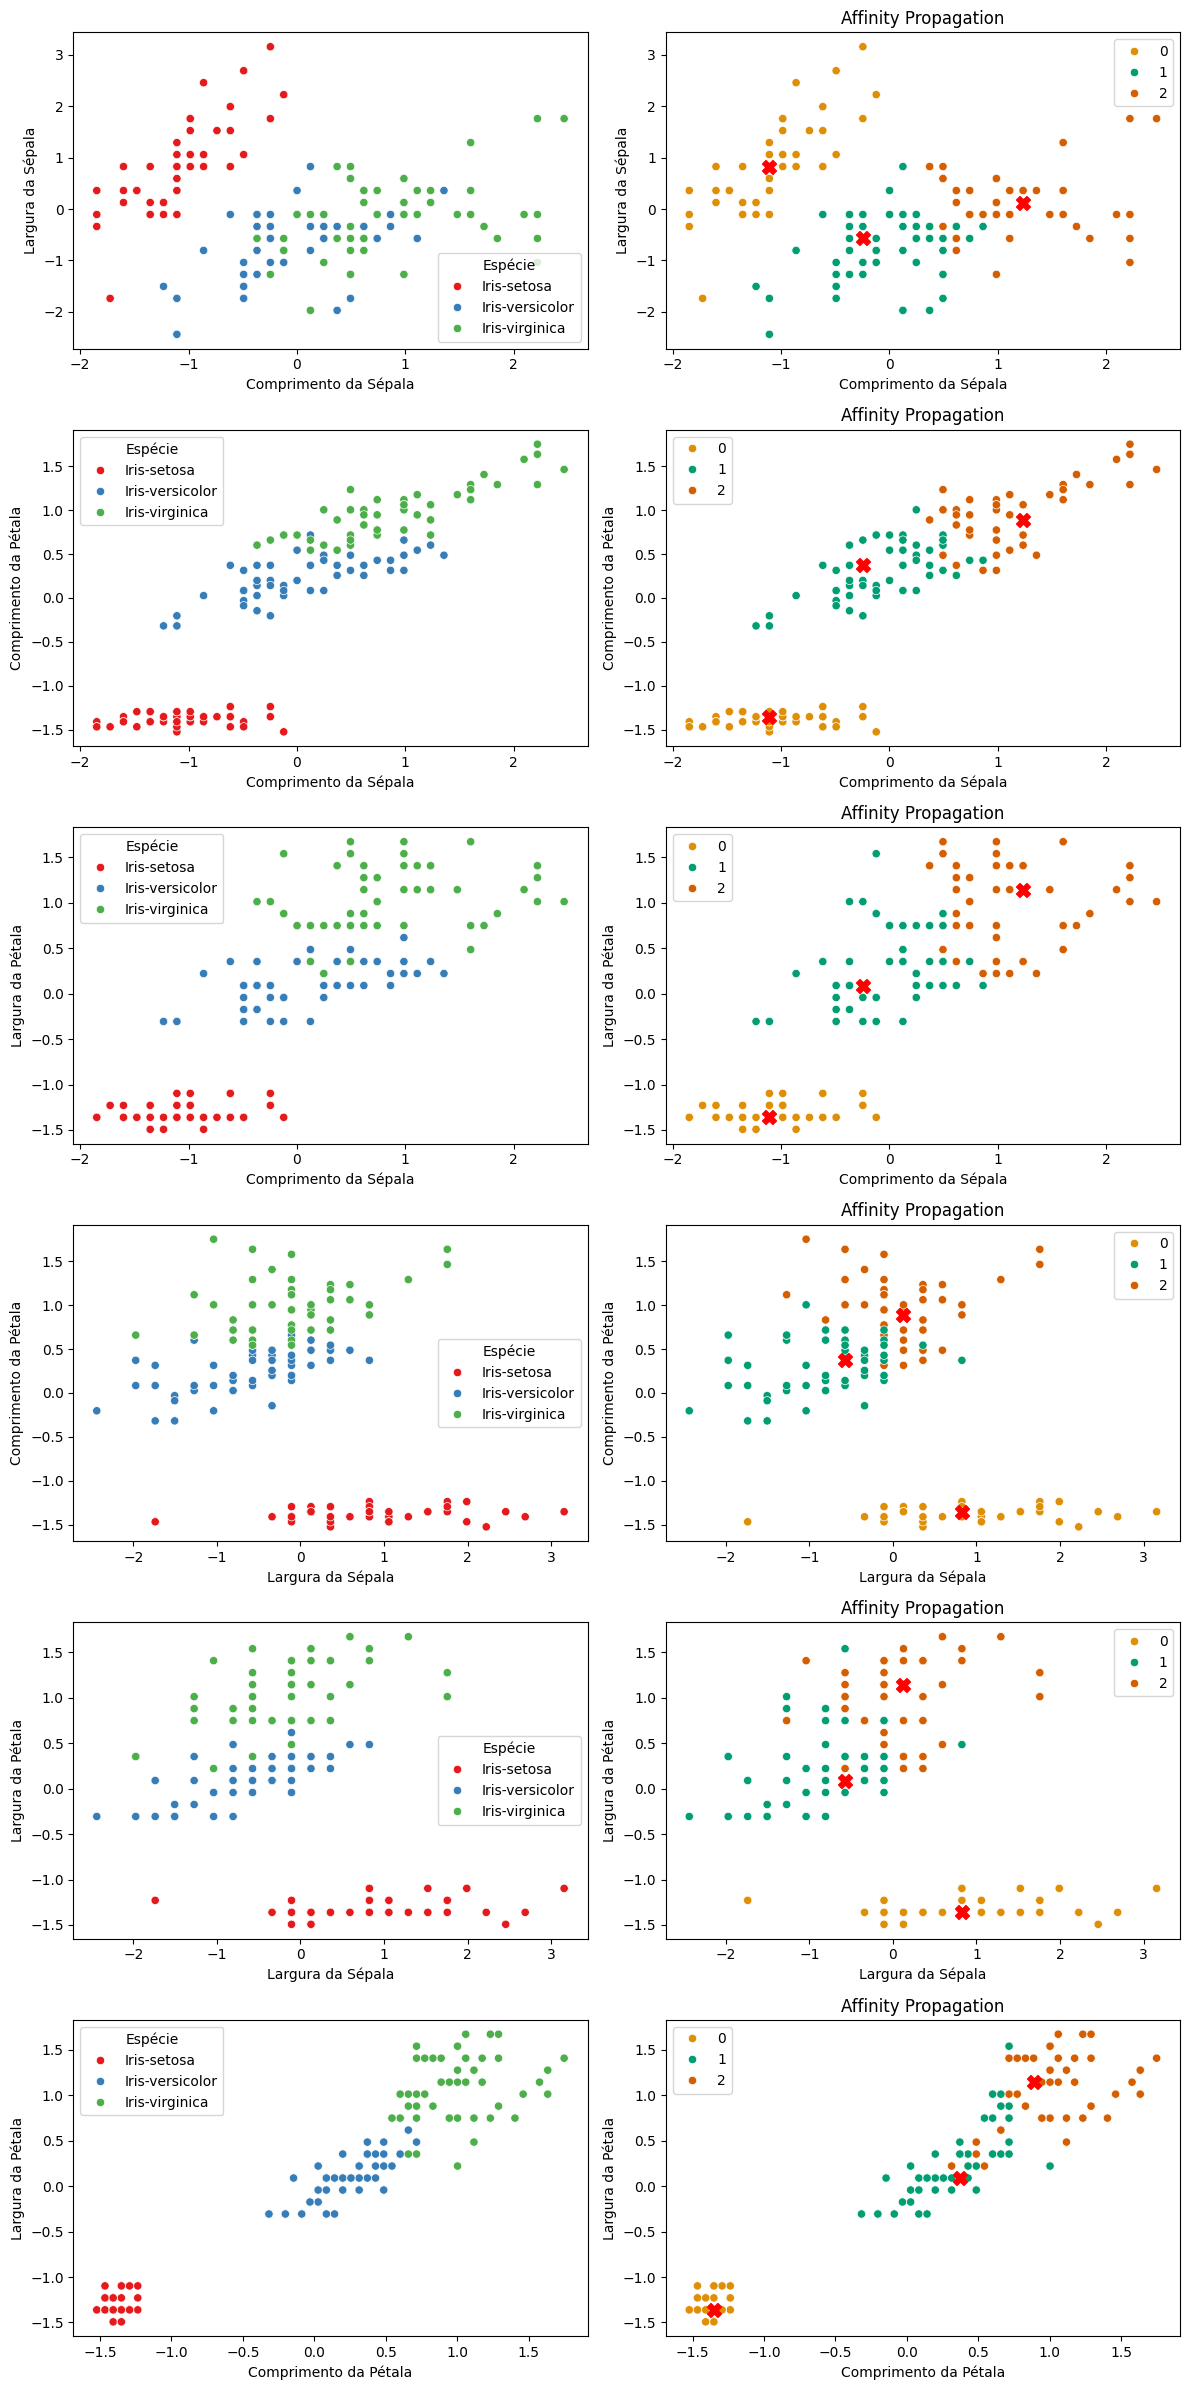

In [34]:
from itertools import combinations

features = XAffProp.columns
exemplars = modelAffProp.cluster_centers_

#GERA AS COMBINAÇÕES COM 2 FEATURES
combinations = list(combinations(features, 2))

plt.figure(figsize=(12, len(combinations) * 4))

for index, (x_feature, y_feature) in enumerate(combinations, 1):
    #GRÁFICO REAL
    plt.subplot(len(combinations), 2, 2 * index - 1)
    sns.scatterplot(
        x=XAffProp[x_feature],
        y=XAffProp[y_feature],
        hue=datasetAffPropArrumado["Espécie"],
        palette="Set1"
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    #GRÁFICO COM AFFINITY PROPAGATION
    plt.subplot(len(combinations), 2, 2 * index)
    sns.scatterplot(
        x=XAffProp[x_feature],
        y=XAffProp[y_feature],
        hue=YAffProp,
        palette=sns.color_palette("colorblind")[1:4]
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title('Affinity Propagation')

    #EXEMPLARS
    plt.scatter(
        exemplars[:, features.get_loc(x_feature)],
        exemplars[:, features.get_loc(y_feature)],
        s=100,
        c='red',
        marker='X',
    )

plt.tight_layout()
plt.show()

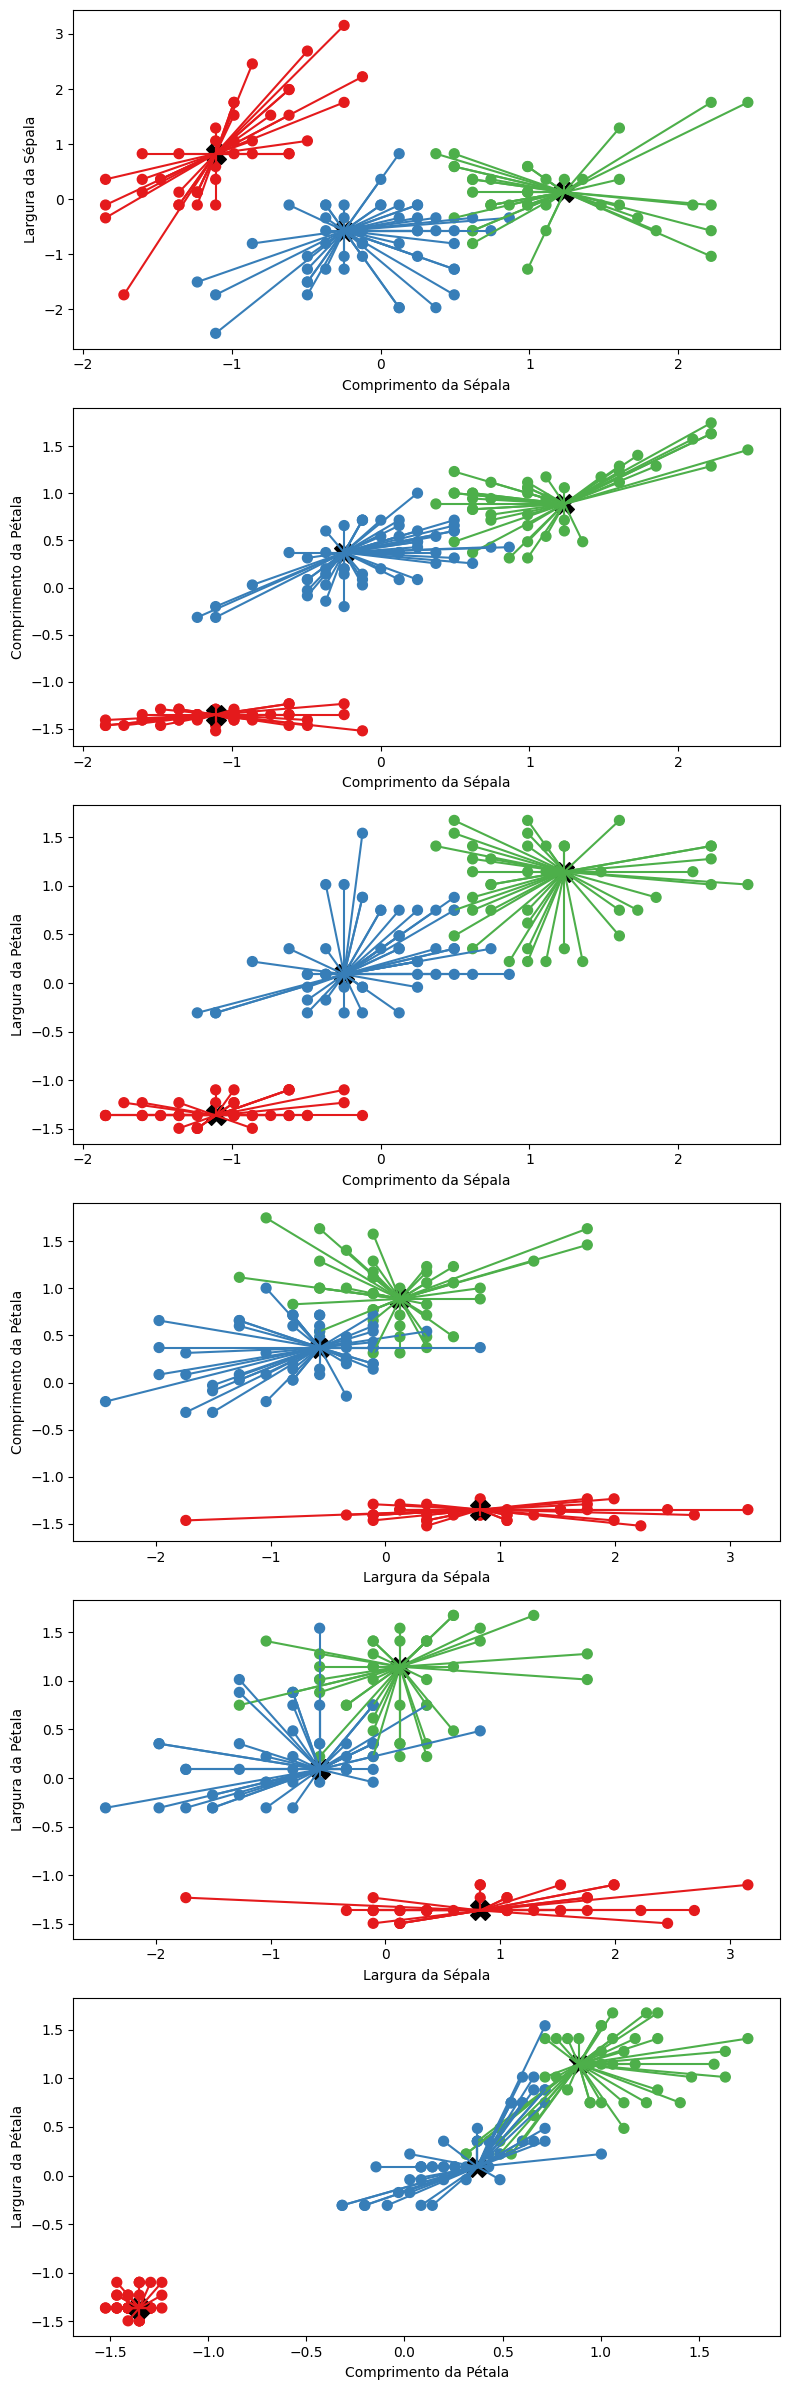

In [35]:
from matplotlib.colors import ListedColormap

exemplar_indices = modelAffProp.cluster_centers_indices_
exemplars = XAffProp.iloc[exemplar_indices].values

plt.figure(figsize=(8, len(combinations) * 4))

for index, (x_feature, y_feature) in enumerate(combinations, 1):
    plt.subplot(len(combinations), 1, index)

    #PONTOS
    plt.scatter(
        XAffProp[x_feature],
        XAffProp[y_feature],
        c=YAffProp,
        cmap=ListedColormap(sns.color_palette("Set1", 3)),
        s=50,
    )

    #EXEMPLARS
    exemplar_x = exemplars[:, features.get_loc(x_feature)]
    exemplar_y = exemplars[:, features.get_loc(y_feature)]
    plt.scatter(
        exemplar_x,
        exemplar_y,
        c='black',
        s=200,
        marker='X',
    )

    #CONEXÕES
    for i, point in enumerate(XAffProp[[x_feature, y_feature]].values):
        exemplar = np.array([exemplar_x[YAffProp[i]], exemplar_y[YAffProp[i]]])
        plt.plot(
            [point[0], exemplar[0]],
            [point[1], exemplar[1]],
            color=sns.color_palette("Set1", 3)[YAffProp[i]],
        )

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout()
plt.show()